# Assignment #5 - Deep Learning (Extra Credits)

### <font color="red"> DUE: Dec 6 (Friday) 11:00 pm </font>  

<font color="blue"> Amit Shetty </font>

# I. Overview

Describe the objective of this assignment. You can briefly state how you accompilsh it.

The objective of this assignment is to understand what deep learning is. Deep learning is a branch of machine learning that forms the basis of artificial neural networks. To understand deep learning, I will be focussing on designing different types of neural neural networks. The process I will be following will be to collect the data and visualisae it to gain some key insights. This will allow me to decide what my input and target variables must be. I will be using keras (https://keras.io/) to implement the neural networks. Keras creates neural networks in the form of models which I will them apply to the data to get some predictons.

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0 (of course for classification). 

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones).

While the datasets are divied into two different wine types, the characters for calulcating the quality of wine still remains the same for both wines

Input variables (based on physicochemical tests): 
1 - fixed acidity 
2 - volatile acidity 
3 - citric acid 
4 - residual sugar 
5 - chlorides 
6 - free sulfur dioxide 
7 - total sulfur dioxide 
8 - density 
9 - pH 
10 - sulphates 
11 - alcohol 

Target variable (based on sensory data): 
12 - quality (score between 0 and 10)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, GlobalMaxPooling1D, SpatialDropout1D, Embedding, Dropout
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import tensorflow
import time
%matplotlib inline

Using TensorFlow backend.


In [2]:
df_red = pd.read_csv("winequality_red.csv")
df_white = pd.read_csv("winequality_white.csv")

We will be adding a new column to our red and white wine datasets tom add a new color column to be able to differentiate between the wines when the datasets are merged

In [3]:
df_red["color"] = "R"

In [4]:
df_white["color"] = "W"

Merging the two red and white wine datasets together for eventual training and testing

In [5]:
df_all=pd.concat([df_red,df_white],axis=0)

In [6]:
df_all.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5     R  
1      9.8        5     R  
2      9.8        5     R  
3      9.8        6     R  
4      9.4        5     R

To avoid any issues withspaces when processing data, we will be renaming the data columns and replacing the spaces with _ characters

In [7]:
df_white.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [8]:
df_red.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [9]:
df_all.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [10]:
df_all.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5     R  
1      9.8        5     R  
2      9.8        5     R  
3      9.8        6     R  
4      9.4        5     R

Dummy variables for modelling. other variables will be normalised when the models are created

In [11]:
df = pd.get_dummies(df_all, columns=["color"])

In [12]:
df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  color_R  color_W  
0         9.4        5        1        0  
1         9.8        5        1        0  
2         9.8        5        1        0  
3         9.8        6        1        0  
4         9.4        5        1        0  
...       ...      ...      ...      ...  
4893     11.2        6        0        1  
4894      9.6        5        0        1  
4895      9.4        6        0        1  
4896     12.8        7        0        1  
4897     11.8        6        0        1  

[6497 rows x 14 columns]

In [13]:
# Checking for nay null values
df_all.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [14]:
df_all.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

Plotting correlation matrices for both red and white wines individually and for the whole combination

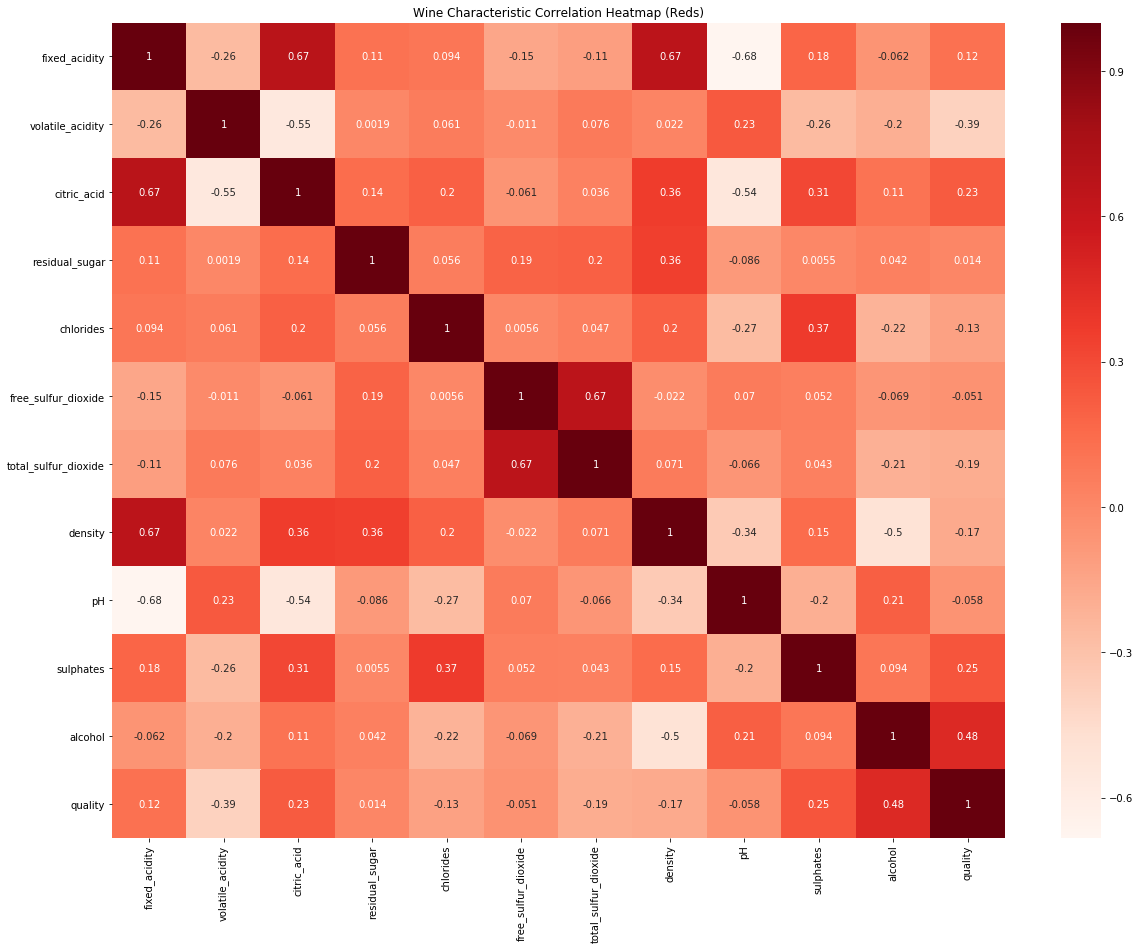

In [15]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Wine Characteristic Correlation Heatmap (Reds)")
corr = df_red.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="Reds")
plt.show()

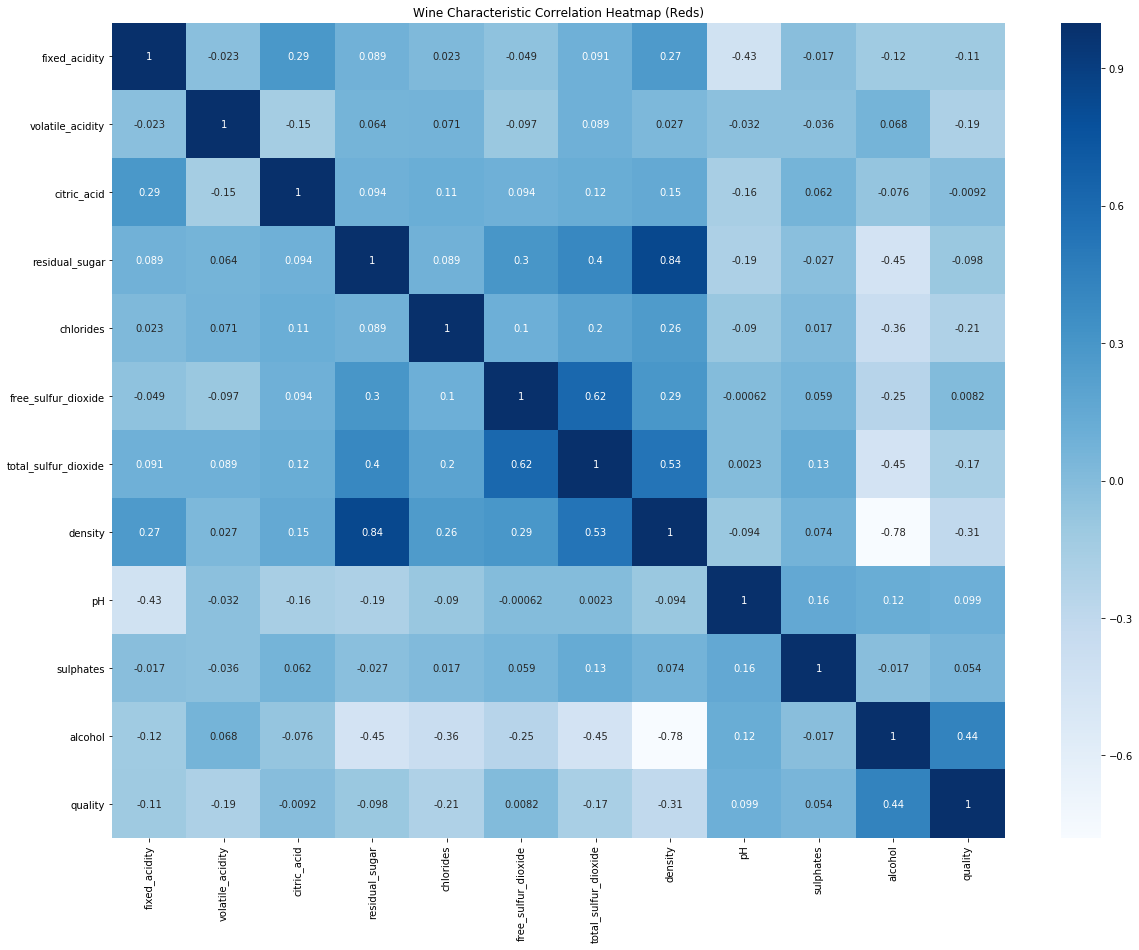

In [16]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Wine Characteristic Correlation Heatmap (Reds)")
corr = df_white.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap = "Blues")
plt.show()

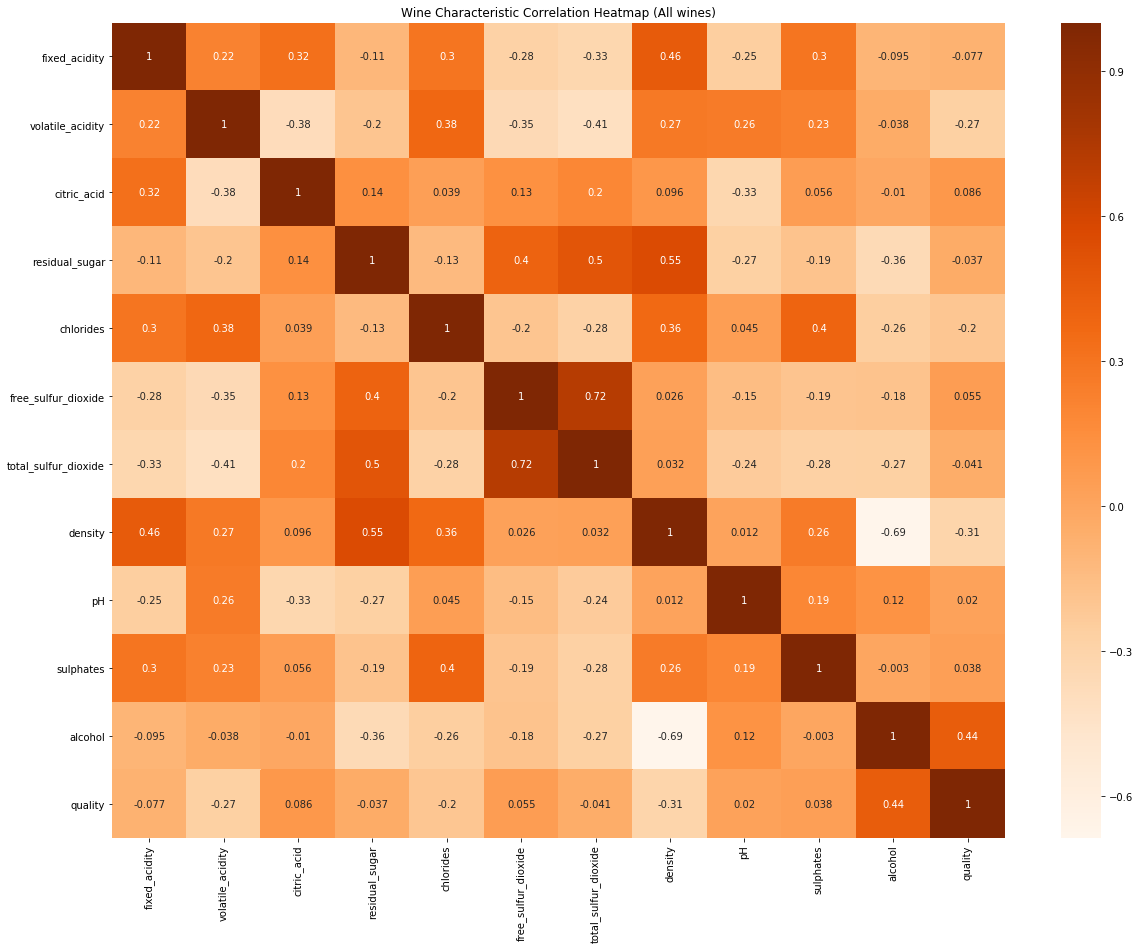

In [17]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Wine Characteristic Correlation Heatmap (All wines)")
corr = df_all.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="Oranges")
plt.show()

Testing association between density of wine and sugar content of red, white and combined wine dataset

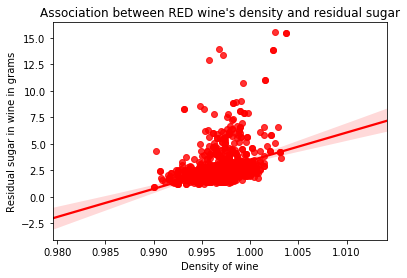

In [18]:
scat1 = sns.regplot(x = "density", y = "residual_sugar", fit_reg = True, color='r', data = df_red)
plt.xlabel("Density of wine")
plt.ylabel("Residual sugar in wine in grams")
plt.title("Association between RED wine's density and residual sugar")
plt.show()

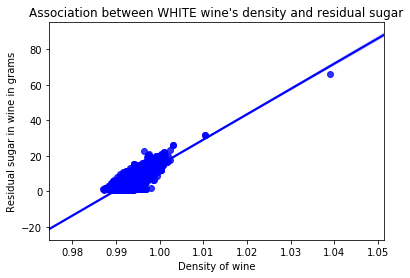

In [19]:
scat1 = sns.regplot(x = "density", y = "residual_sugar", fit_reg = True, color='b', data = df_white)
plt.xlabel("Density of wine")
plt.ylabel("Residual sugar in wine in grams")
plt.title("Association between WHITE wine's density and residual sugar")
plt.show()

We will now be checking how the quality of wine is distributed for red and white wines and combined dataset

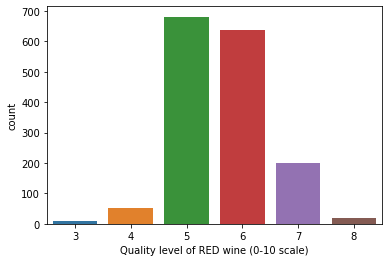

In [20]:
df_red["quality"] = pd.Categorical(df_red["quality"])
sns.countplot(x="quality", data=df_red)
plt.xlabel("Quality level of RED wine (0-10 scale)")
plt.show()

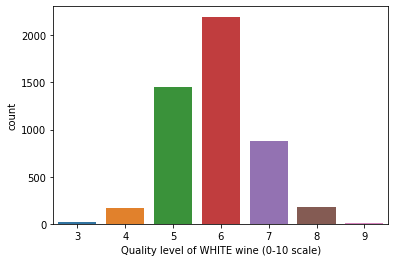

In [21]:
df_white["quality"] = pd.Categorical(df_white["quality"])
sns.countplot(x="quality", data=df_white)
plt.xlabel("Quality level of WHITE wine (0-10 scale)")
plt.show()

One of the key factors affecting the quality is the amount of alchohol in the wine

C:\Users\Amit\.conda\envs\testenv_1\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


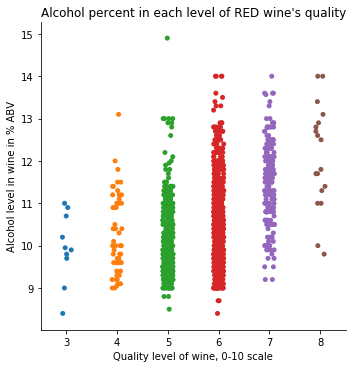

In [22]:
sns.factorplot(x="quality", y="alcohol", data=df_red, kind="strip")
plt.xlabel("Quality level of wine, 0-10 scale")
plt.ylabel("Alcohol level in wine in % ABV")
plt.title("Alcohol percent in each level of RED wine's quality")
plt.show()

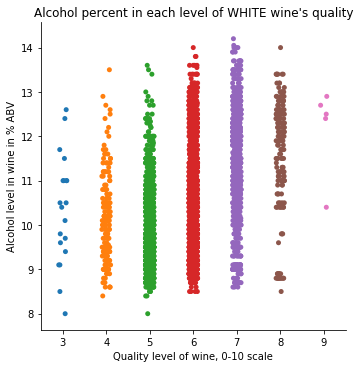

In [23]:
sns.factorplot(x="quality", y="alcohol", data=df_white, kind="strip")
plt.xlabel("Quality level of wine, 0-10 scale")
plt.ylabel("Alcohol level in wine in % ABV")
plt.title("Alcohol percent in each level of WHITE wine's quality")
plt.show()

We will be seeing the distribution of volatile acidity over both red and white wine

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

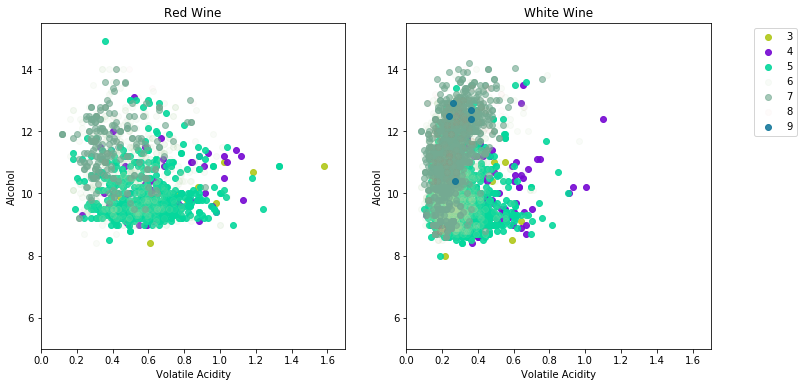

In [24]:
redlabels = np.unique(df_red['quality'])
whitelabels = np.unique(df_white['quality'])
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plt.title('Distribution of Voltile Acidity in Red and White Wine')
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = df_red['alcohol'][df_red.quality == redlabels[i]]
    redx = df_red['volatile_acidity'][df_red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = df_white['alcohol'][df_white.quality == whitelabels[i]]
    whitex = df_white['volatile_acidity'][df_white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))

plt.show()

To summarise the data collection, plotting the correlation between all the different variables with the final quality

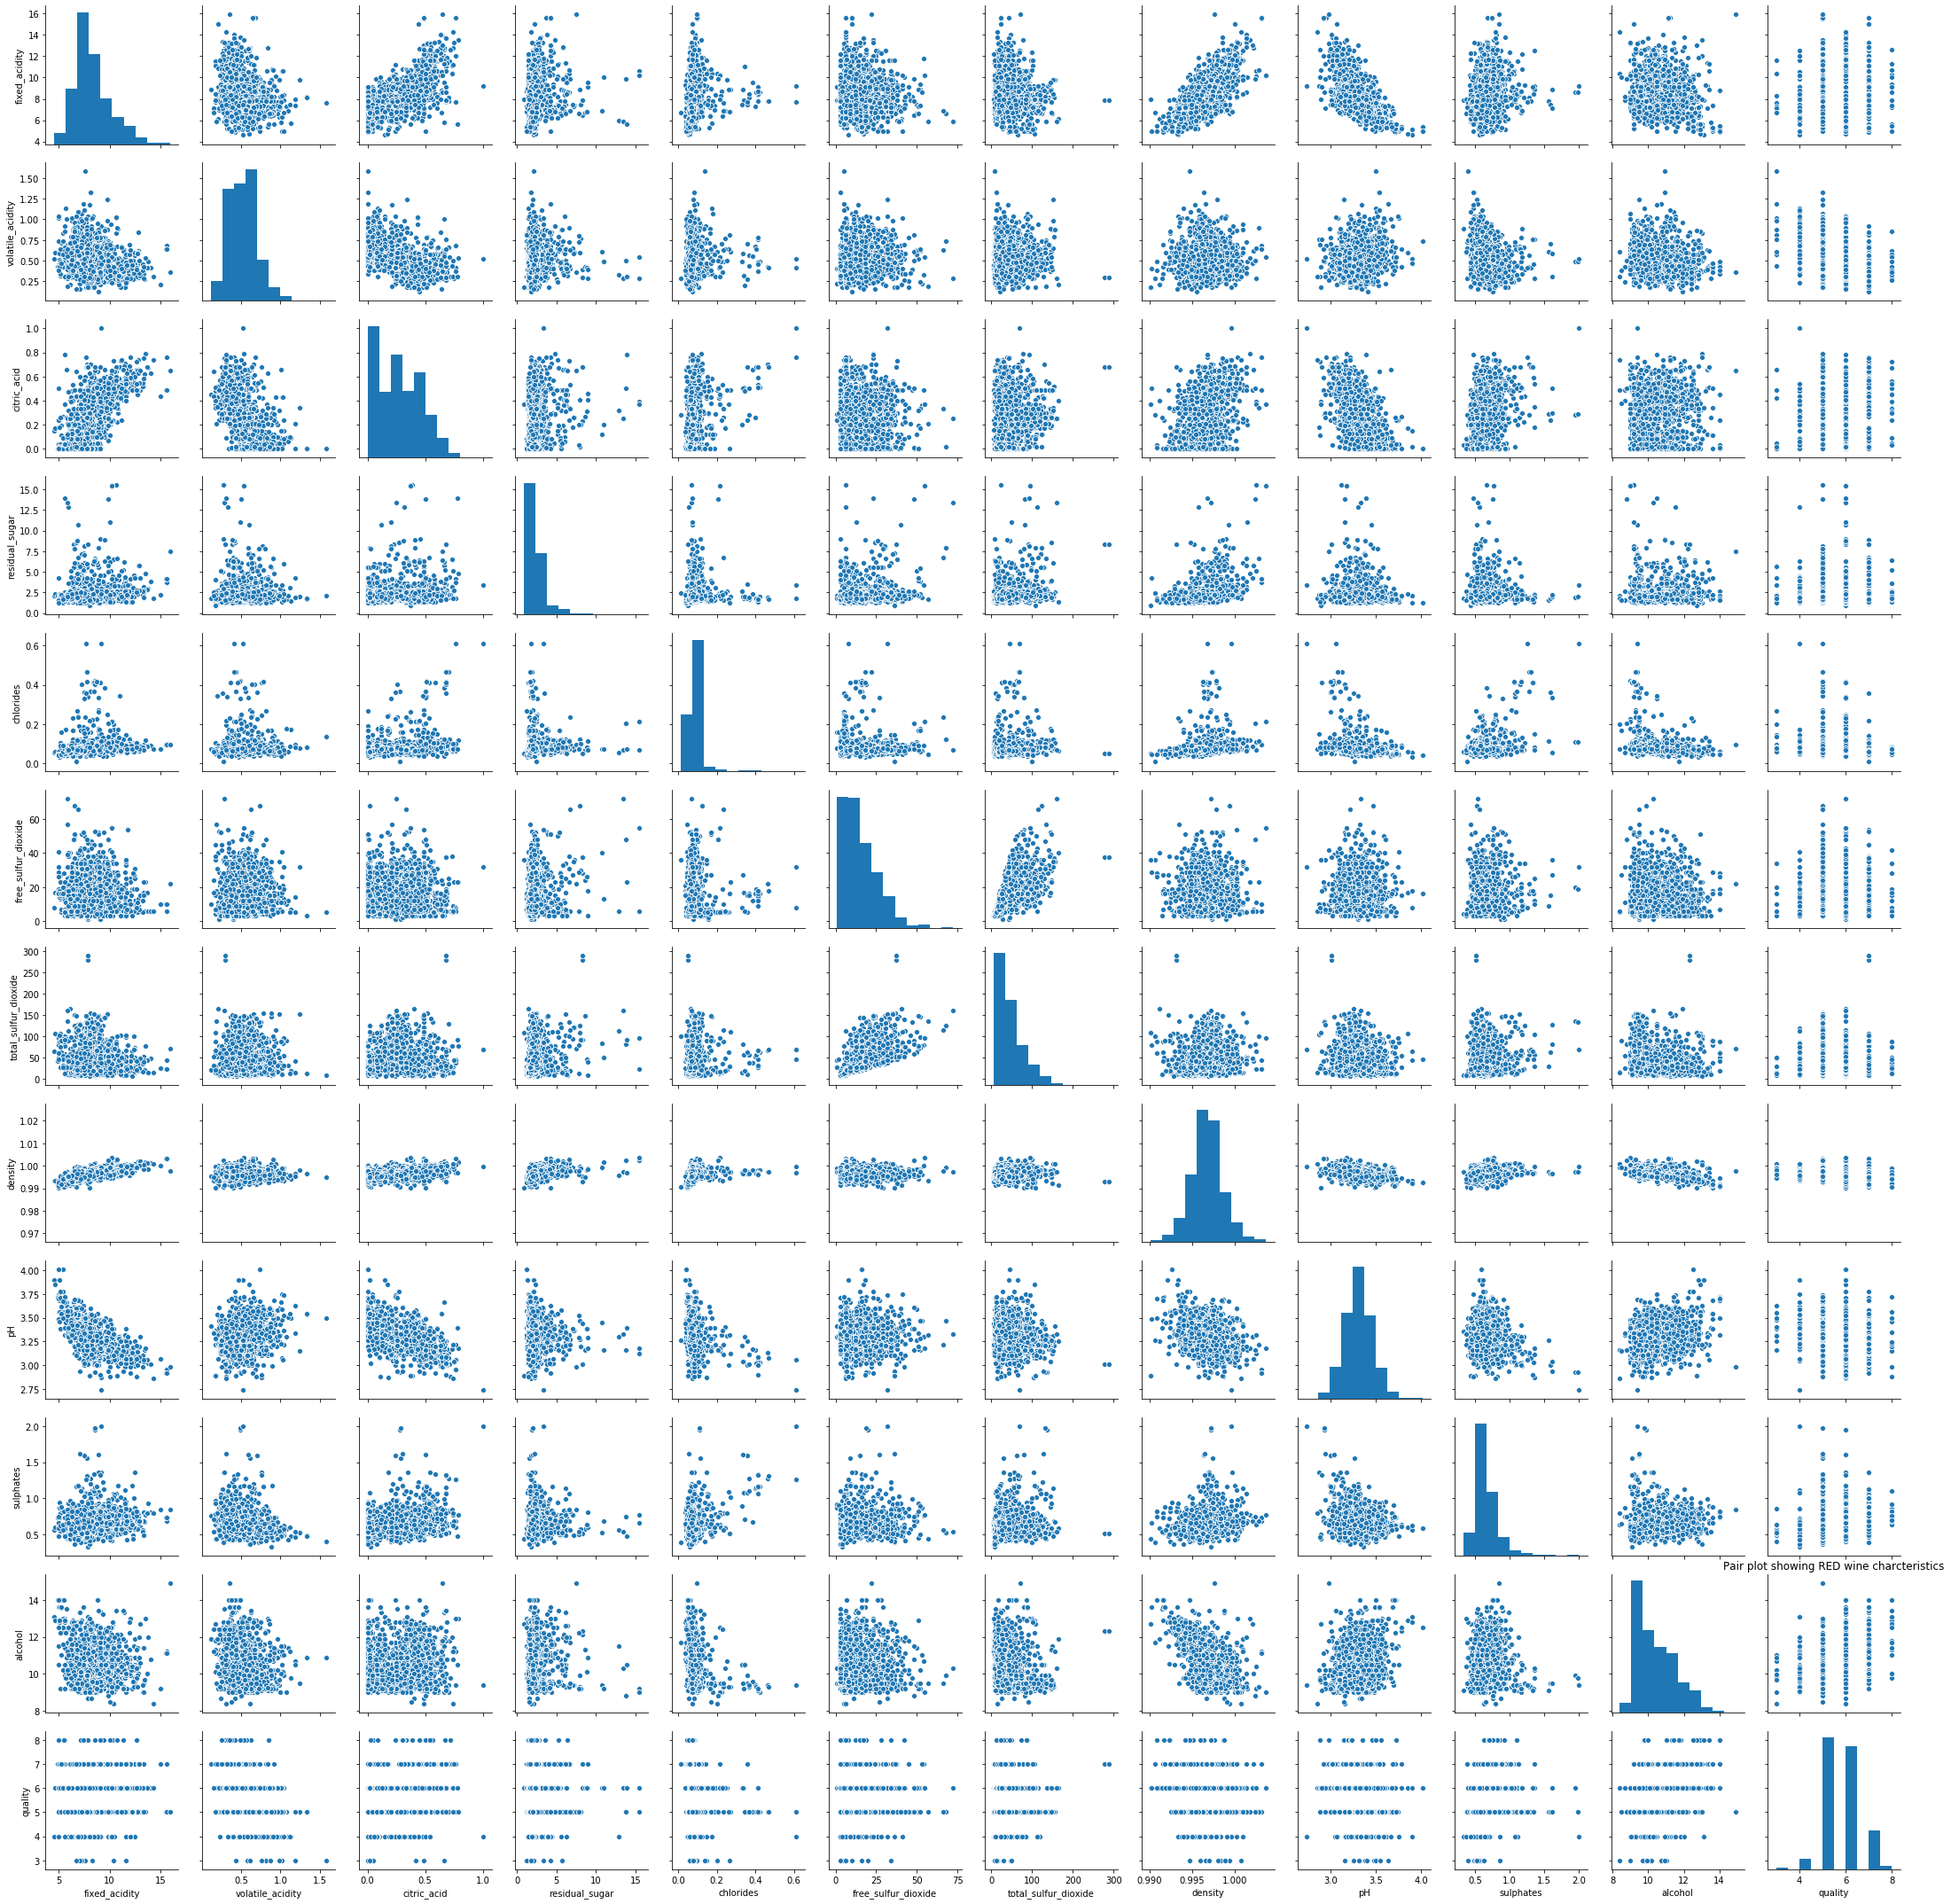

In [25]:
sns.pairplot(df_red, vars=df_red.columns[:-1])
plt.title("Pair plot showing RED wine charcteristics")
plt.show()

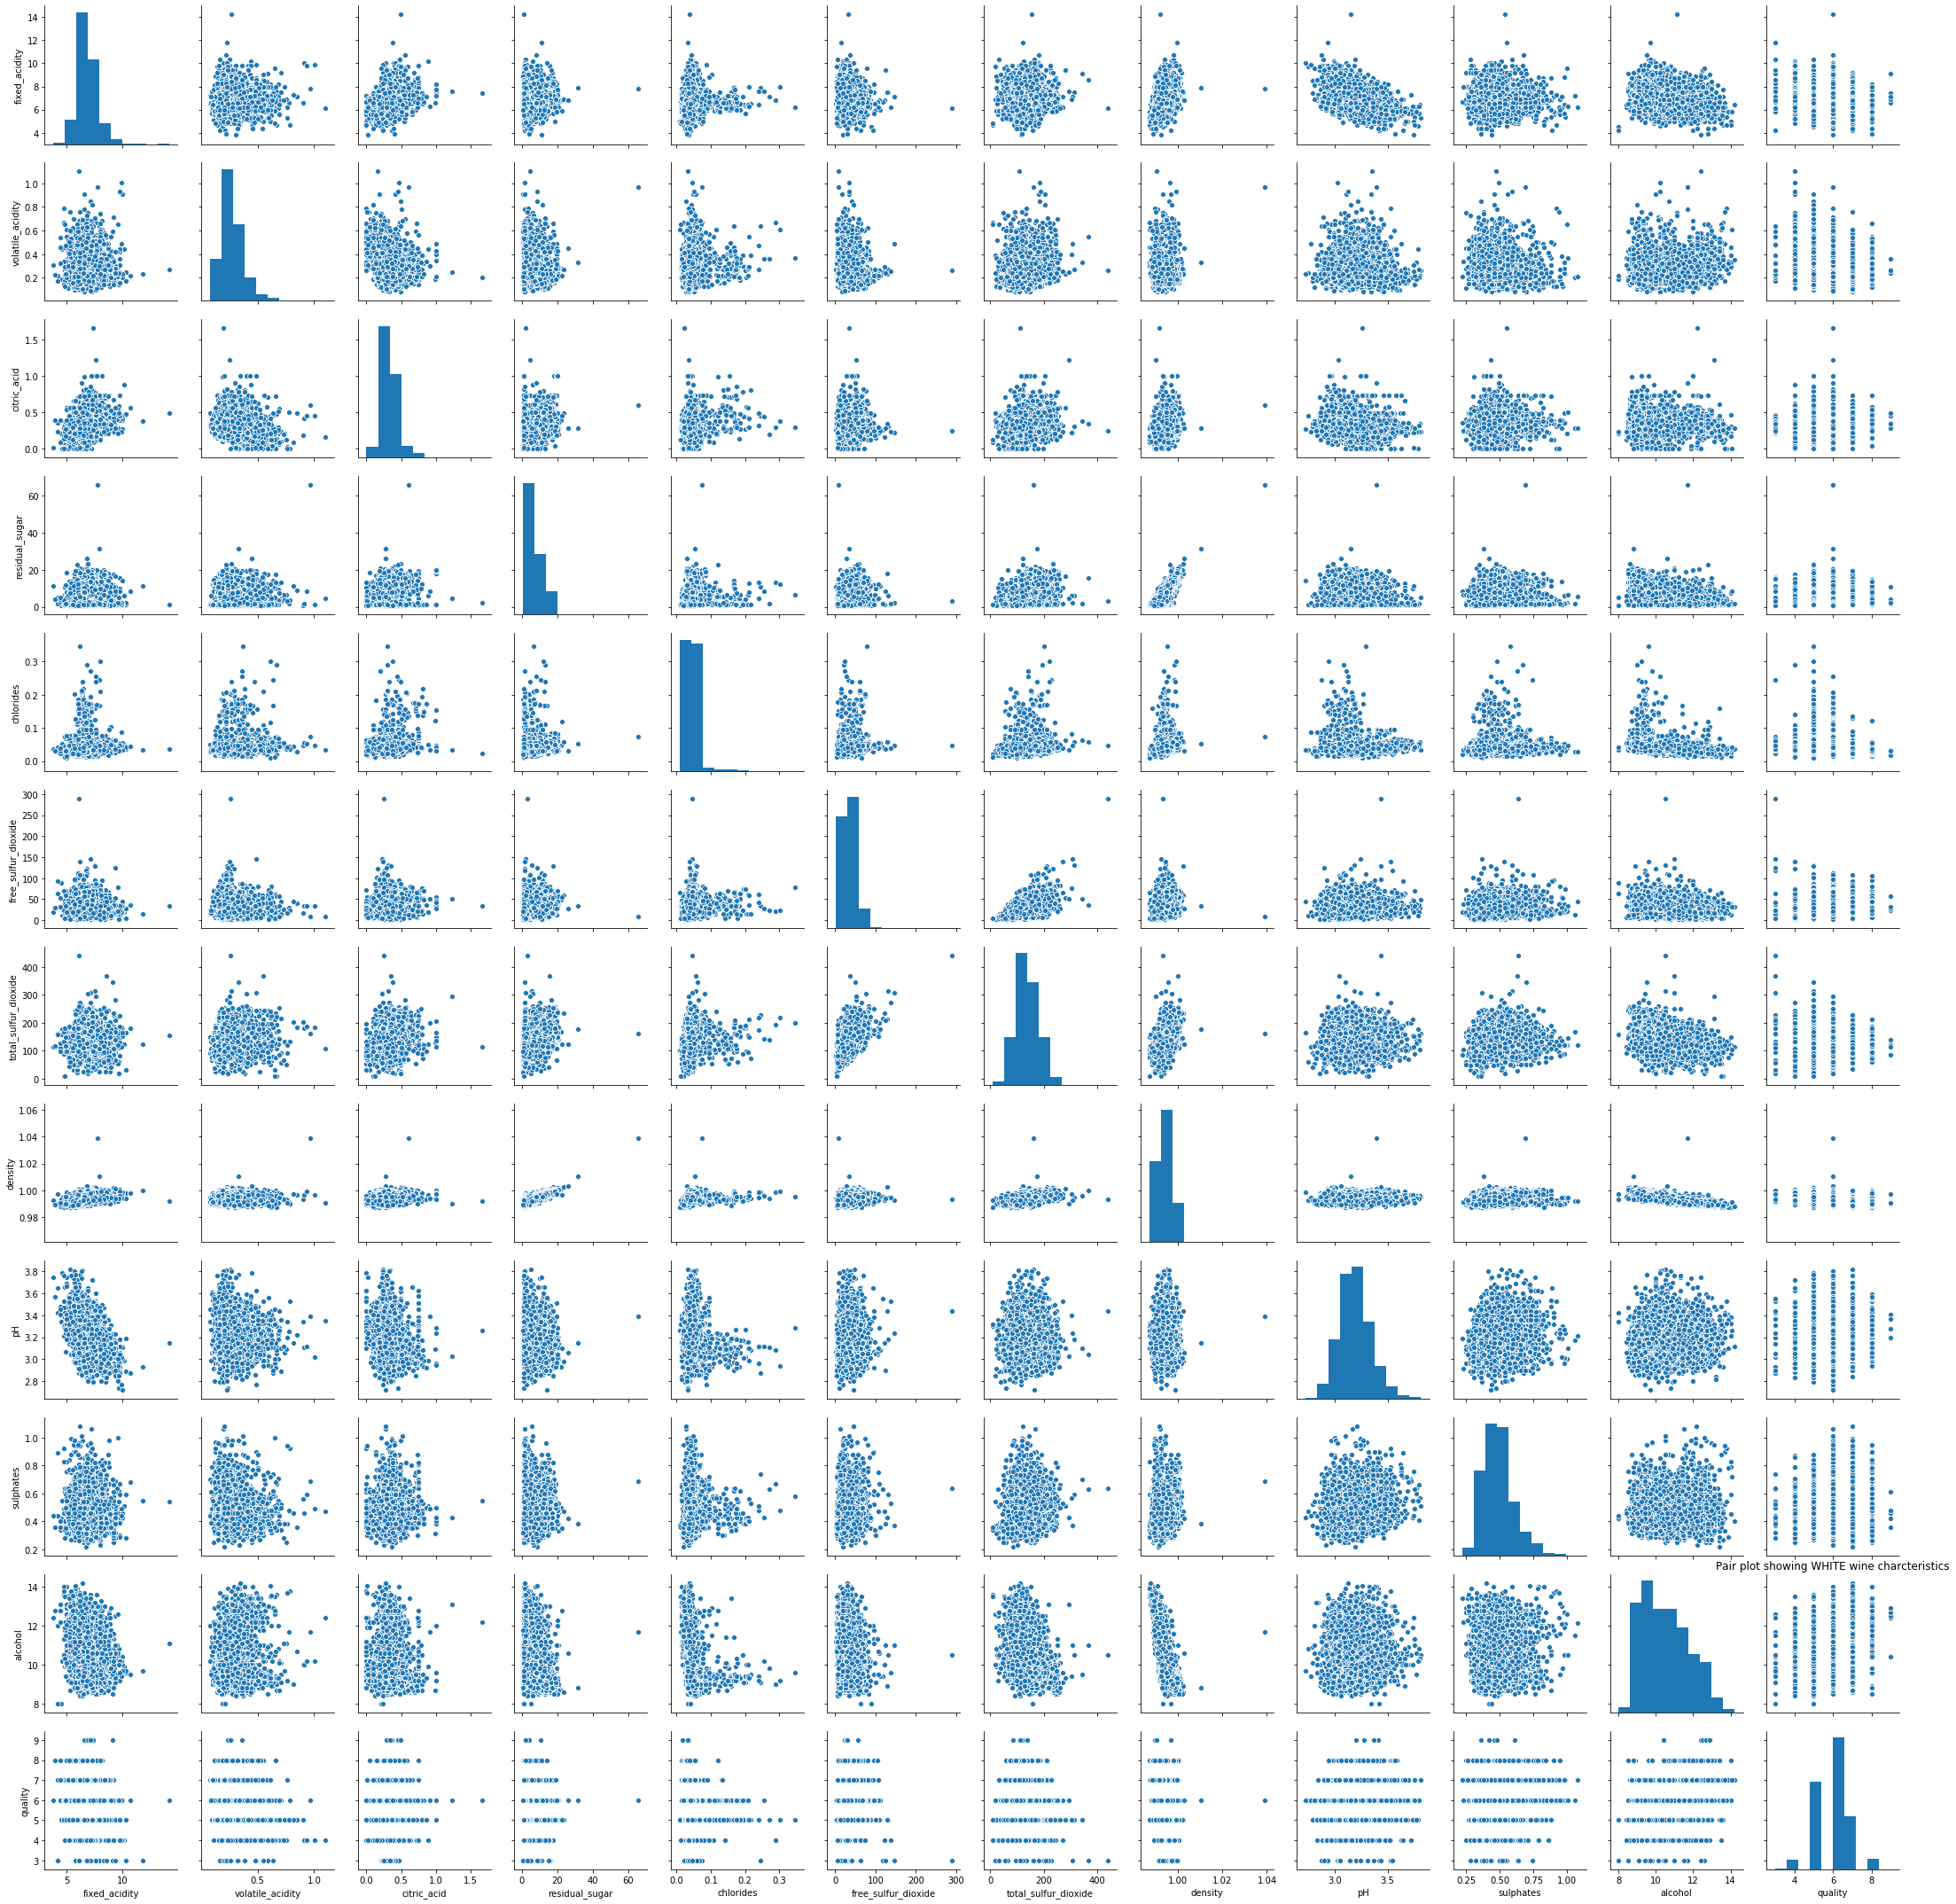

In [26]:
sns.pairplot(df_white, vars=df_white.columns[:-1])
plt.title("Pair plot showing WHITE wine charcteristics")
plt.show()

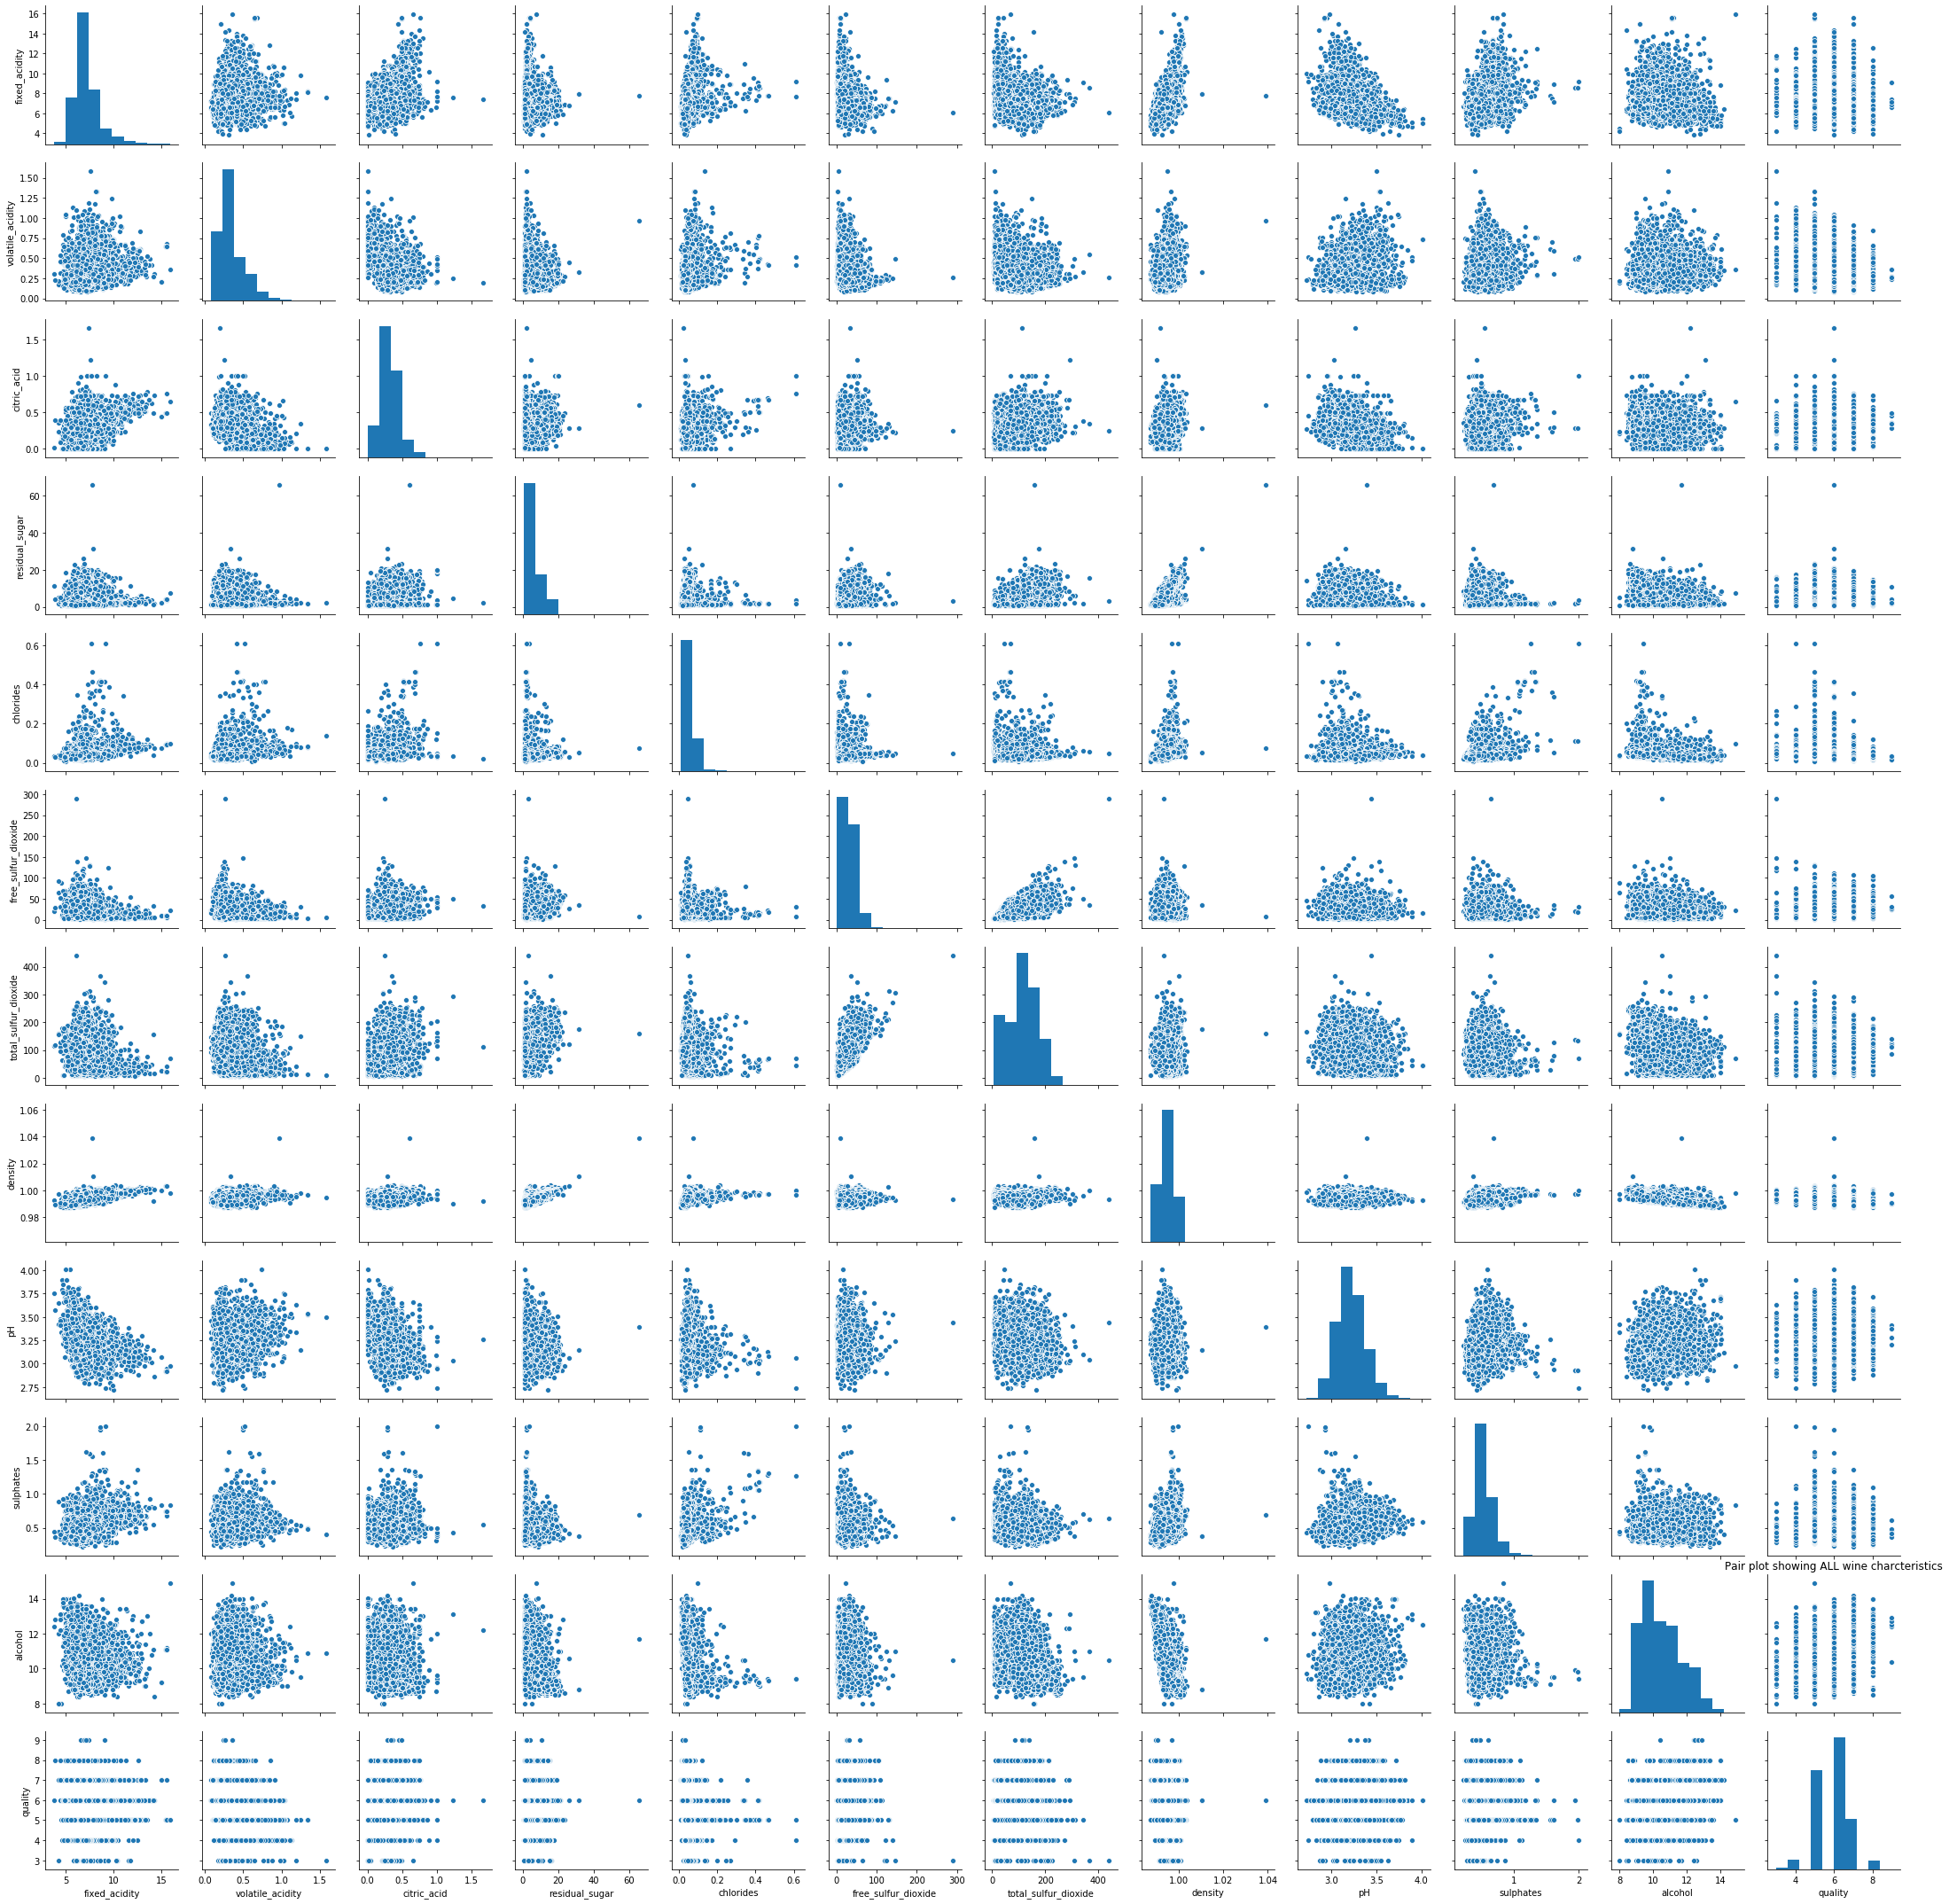

In [27]:
sns.pairplot(df_all, vars=df_all.columns[:-1])
plt.title("Pair plot showing ALL wine charcteristics")
plt.show()

### Results Summary Discussion

- We have two target variables in our dataset. Each serves different purposes. The 'quality' column determines form a scale from 0-10 which will be used in our regression modelling. The 'color' column has 2 unique categories 'Red' and 'White' whihc is the type of wine which meets the characteristics

- The input variables will be the attributes that are determined by people's subjectives observations and certain known qualities of the wine.

- From the correlation matrix we can see that citric acid, sulphates, fixed acidity and alcholhol content determine how good the red and white wine is.

- The denisty ditribution shows that red wine is more dense than white wine which will have an obvious effect on its taste and corresponding attributes.

- However despite the previous observation of red wine being richer than white wine, the quality distribution shows that white wine enjoys a more priveleged position

- The scatter plot show variation of alchohol levels in white wine and red wine where red wine has a more scattered densoty distribution compared to white wine.


Refer: https://www.datacamp.com/community/tutorials/deep-learning-python

# III. Methods

In this assignment, you are building a deep network with more than 5 layers using TensorFlow. 
Looking at the chart below, get some idea about how you can construct your networks for what problem and why you pick your structure. 

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow (or Keras) codes. 
- Explain how you apply your model to your data. 

Following images are only for you to get some idea. You do not necessarily stick with these. You can come up with your own structure or shape. 

<img src="https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67" width=700 />



We now have to determine the input and the target variables will be. In our case, target variable will be the type of wine i.e. red or white depending on the remaining attributes in our dataset.

In [28]:
X = df_all.iloc[:, :11]
X.shape

(6497, 11)

In [29]:
T = df_all.iloc[:, 12:13]
T.shape

(6497, 1)

In [30]:
# Apply one hot encoder
ohe = OneHotEncoder()
T = ohe.fit_transform(T).toarray()

In [31]:
X_train,X_test,T_train,T_test = train_test_split(X,T,test_size = 0.2)

In [32]:
T

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

### Method 1: Simple Feed Forward Neural Network Model (Classification)

The simplest kind of neural network is a single-layer perceptron network, which consists of a single layer of output nodes; the inputs are fed directly to the outputs via a series of weights. The sum of the products of the weights and the inputs is calculated in each node, and if the value is above some threshold (typically 0) the neuron fires and takes the activated value (typically 1); otherwise it takes the deactivated value (typically -1). Neurons with this kind of activation function are also called artificial neurons or linear threshold units. The goal of a feedforward network is to approximate some function f*. For example, for a classiﬁer, y = f*(x) maps an input x to a category y. A feedforward network deﬁnes a mapping y = f(x;θ) and learns the value of the parameters θ that result in the best function approximation. These models are called feedforward because information ﬂows through the function being evaluated from x, through the intermediate computations used to deﬁne f, and ﬁnally to the output y. There are no feedback connections in which outputs of the model are fed back into itself.

#### Implementation Technique

- I will be using Keras to build the neural network model as it makes it easier to easily tweak the paramters needed to build each layer of the neural network

- As I am building a basic neual network for my initial of the 3 models to build, I will be vuilding using a one input layer, two hidden layers and one output layer with 2 neurons which is the scope of the data at hand.

- The input dimensions will be noted at 11 whihc is the attibutes that I am using as the deciding factor for the red and white wine classification.

- The activation function used for the hidden layers is rectified linear units (ReLU) and the final activation function used for classifiction will be the softmanx function.

- Keras provides an option to compile the model using epochs and batch sizes for muliple loads to be send for compilation.

- We will also be checking how the model performs by issuing the test data as a validation set and compiling the model.

In [33]:
model = Sequential()
model.add(Dense(20, input_dim=11, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
# history = model.fit(X_train, T_train, epochs=100, batch_size=64)

In [36]:
# T_pred = model.predict(X_test)
# #Converting predictions to label
# pred = list()
# for i in range(len(T_pred)):
#     pred.append(np.argmax(T_pred[i]))
# #Converting one hot encoded test label to label
# test = list()
# for i in range(len(T_test)):
#     test.append(np.argmax(T_test[i]))

In [37]:
# pred

In [38]:
# test

Applyting model by training and validating using test set

In [39]:
start_time_1 = time.time()
history = model.fit(X_train, T_train,validation_data = (X_test,T_test), epochs=100, batch_size=64)
end_time_1 = time.time()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 5197 samples, validate on 1300 samples
Epoch 1/100





5197/5197 [==============================] - 1s 115us/step - loss: 8.4306 - acc: 0.4099 - val_loss: 0.3108 - val_acc: 0.8769
Epoch 2/100
5197/5197 [==============================] - 0s 16us/step - loss: 0.2654 - acc: 0.9009 - val_loss: 0.2317 - val_acc: 0.9162
Epoch 3/100
5197/5197 [==============================] - 0s 16us/step - loss: 0.2301 - acc: 0.9142 - val_loss: 0.2195 - val_acc: 0.9185
Epoch 4/100
5197/5197 [==============================] - 0s 15us/step - loss: 0.2176 - acc: 0.9217 - val_loss: 0.2076 - val_acc: 0.9231
Epoch 5/100
5197/5197 [==============================] - 0s 17us/step - loss: 0.2027 - acc: 0.9271 - val_loss: 0.1988 - val_acc: 0.9285
Epoch 6/100
5197/5197 [==============================] - 0s 19us/step - loss: 0.1996 - acc: 0.9292 - val_loss: 0.2122 - val_acc: 0.9215
Epoch 7/100
5197/5197 [==========

Epoch 46/100
5197/5197 [==============================] - 0s 17us/step - loss: 0.0734 - acc: 0.9804 - val_loss: 0.0802 - val_acc: 0.9738
Epoch 47/100
5197/5197 [==============================] - 0s 17us/step - loss: 0.0749 - acc: 0.9771 - val_loss: 0.0940 - val_acc: 0.9715
Epoch 48/100
5197/5197 [==============================] - 0s 16us/step - loss: 0.0670 - acc: 0.9804 - val_loss: 0.0695 - val_acc: 0.9738
Epoch 49/100
5197/5197 [==============================] - 0s 17us/step - loss: 0.0674 - acc: 0.9802 - val_loss: 0.0714 - val_acc: 0.9769
Epoch 50/100
5197/5197 [==============================] - 0s 17us/step - loss: 0.0663 - acc: 0.9802 - val_loss: 0.0688 - val_acc: 0.9746
Epoch 51/100
5197/5197 [==============================] - 0s 17us/step - loss: 0.0662 - acc: 0.9823 - val_loss: 0.0800 - val_acc: 0.9746
Epoch 52/100
5197/5197 [==============================] - 0s 17us/step - loss: 0.0690 - acc: 0.9808 - val_loss: 0.0726 - val_acc: 0.9769
Epoch 53/100
5197/5197 [=================

In [40]:
print("Time taken to execute model 1 ==> {} seconds".format(end_time_1 - start_time_1))

Time taken to execute model 1 ==> 9.786781072616577 seconds


A summary to show to give an overview of the model created and the number of trainable parameters among other info.

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 472
Trainable params: 472
Non-trainable params: 0
_________________________________________________________________


In [42]:
T_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(T_pred)):
    pred.append(np.argmax(T_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(T_test)):
    test.append(np.argmax(T_test[i]))

### Simple Feed Forward Neural Network Model (Regression)

The simplest kind of neural network is a single-layer perceptron network, which consists of a single layer of output nodes; the inputs are fed directly to the outputs via a series of weights. The sum of the products of the weights and the inputs is calculated in each node, and if the value is above some threshold (typically 0) the neuron fires and takes the activated value (typically 1); otherwise it takes the deactivated value (typically -1). Neurons with this kind of activation function are also called artificial neurons or linear threshold units. The goal of a feedforward network is to approximate some function f*. For example, for a classiﬁer, y = f*(x) maps an input x to a category y. A feedforward network deﬁnes a mapping y = f(x;θ) and learns the value of the parameters θ that result in the best function approximation. These models are called feedforward because information ﬂows through the function being evaluated from x, through the intermediate computations used to deﬁne f, and ﬁnally to the output y. There are no feedback connections in which outputs of the model are fed back into itself.

#### Implementation Technique

- I will be using Keras to build the neural network model as it makes it easier to easily tweak the paramters needed to build each layer of the neural network

- As I am building a basic neual network for my second of the 3 models to build, I will be vuilding using a 11  input layers followed by decresing number hidden layers and one output layer with 1 neurons which is the scope of the data at hand.

- The input dimensions will be noted at 11 whihc is the attibutes that I am using as the deciding factor for the quality of wine.

- I will not be using activation function for the output and the final activation function used for regression will be the mean squared error function.

- Keras provides an option to compile the model using epochs and batch sizes for muliple loads to be send for compilation.

- We will also be checking how the model performs by issuing the test data as a validation set and compiling the model.

In [43]:
X1 = X.iloc[:,0:11]
X1

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
4893     11.2  
4894      9.6  
4895      9.4  
4896     12.8  
4897     11.8  

[6497 rows x 11 columns]

In [44]:
T1 = df_all.iloc[:, 11:12]
T1

quality
0           5
1           5
2           5
3           6
4           5
...       ...
4893        6
4894        5
4895        6
4896        7
4897        6

[6497 rows x 1 columns]

In [45]:
X1_train,X1_test,T1_train,T1_test = train_test_split(X1,T1,test_size = 0.2)

In [46]:
X1_train.shape

(5197, 11)

In [47]:
T1_train.shape

(5197, 1)

In [48]:
model1 = Sequential()
model1.add(Dense(11, input_dim=11, activation='relu'))
model1.add(Dense(9, activation='relu'))
model1.add(Dense(7, activation='relu'))
model1.add(Dense(5, activation='relu'))
model1.add(Dense(3, activation='relu'))
model1.add(Dense(1))

In [49]:
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [50]:
start_time_2 = time.time()
history1 = model1.fit(X1_train, T1_train, validation_data = (X1_test,T1_test), epochs=100, batch_size=32)
end_time_2 = time.time()

Train on 5197 samples, validate on 1300 samples
Epoch 1/100
5197/5197 [==============================] - 1s 151us/step - loss: 8.1728 - acc: 0.1256 - val_loss: 5.2585 - val_acc: 0.1546
Epoch 2/100
5197/5197 [==============================] - 0s 31us/step - loss: 3.1244 - acc: 0.2473 - val_loss: 0.8631 - val_acc: 0.4415
Epoch 3/100
5197/5197 [==============================] - 0s 38us/step - loss: 0.7411 - acc: 0.4745 - val_loss: 0.6403 - val_acc: 0.4969
Epoch 4/100
5197/5197 [==============================] - 0s 29us/step - loss: 0.6316 - acc: 0.4955 - val_loss: 0.6059 - val_acc: 0.5054
Epoch 5/100
5197/5197 [==============================] - 0s 27us/step - loss: 0.6115 - acc: 0.4947 - val_loss: 0.6026 - val_acc: 0.4723
Epoch 6/100
5197/5197 [==============================] - 0s 28us/step - loss: 0.6065 - acc: 0.5005 - val_loss: 0.5845 - val_acc: 0.5046
Epoch 7/100
5197/5197 [==============================] - 0s 29us/step - loss: 0.5942 - acc: 0.5082 - val_loss: 0.5900 - val_acc: 0.5062

In [51]:
print("Time taken to execute model 2 ==> {} seconds".format(end_time_2 - start_time_2))

Time taken to execute model 2 ==> 16.264949798583984 seconds


A summary to show to give an overview of the model created and the number of trainable parameters among other info.

In [52]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 108       
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 70        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 4         
Total params: 372
Trainable params: 372
Non-trainable params: 0
_________________________________________________________________


In [53]:
T1_pred = model1.predict(X1_test)

In [54]:
T1_pred.shape

(1300, 1)

In [55]:
T1_pred = np.array(T1_pred)

In [56]:
# Rounding the values to determine the exact quality of wine
T1_pred = np.round(T1_pred)

### Long Short Term Memory Model (LSTM) (Classification)

Long Short-Term Memory units, or LSTMs, was proposed by the German researchers Sepp Hochreiter and Juergen Schmidhuber as a solution to the vanishing gradient problem.
LSTMs help preserve the error that can be backpropagated through time and layers. By maintaining a more constant error, they allow recurrent nets to continue to learn over many time steps (over 1000), thereby opening a channel to link causes and effects remotely. This is one of the central challenges to machine learning and AI, since algorithms are frequently confronted by environments where reward signals are sparse and delayed, such as life itself.
LSTMs contain information outside the normal flow of the recurrent network in a gated cell. Information can be stored in, written to, or read from a cell, much like data in a computer’s memory. The cell makes decisions about what to store, and when to allow reads, writes and erasures, via gates that open and close. Unlike the digital storage on computers, however, these gates are analog, implemented with element-wise multiplication by sigmoids, which are all in the range of 0-1. Analog has the advantage over digital of being differentiable, and therefore suitable for backpropagation.

#### Implementation Technique

- I will be using Keras to build this model since it is much easier to build the model and finetune the hyperparameters

- I will be using the LSTM layer as the primary layer where the neural network is trainied.

- In order to ease the flow of data to the LSTM layer I'll be limiting the large input size into 256 splits.

- The SpatialDropout will ensure that any nodes that have a probavility of 30 percent or lower will be ignored adn then sent to the LSTM

- Applying a dropout with a 30 percent hyper parameter is sued to filter down the complex output further into a simpler output

- Post processing will involve using the RELU activation function followed by a softmax activation application to finalise out classification model.

In [57]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = 6000, output_dim = 256))
model_lstm.add(SpatialDropout1D(0.3))
model_lstm.add(LSTM(256, dropout = 0.3, recurrent_dropout = 0.3))
model_lstm.add(Dense(256, activation = 'relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(2, activation = 'softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [58]:
model_lstm.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [59]:
T2_pred = model_lstm.predict(X_test)

In [60]:
T2_pred.shape

(1300, 2)

In [61]:
T2_pred

array([[0.507182  , 0.49281803],
       [0.5035891 , 0.4964109 ],
       [0.5044344 , 0.49556562],
       ...,
       [0.50284517, 0.4971549 ],
       [0.5038634 , 0.49613655],
       [0.5038127 , 0.49618733]], dtype=float32)

In [62]:
#Converting predictions to label
pred2 = list()
for i in range(len(T2_pred)):
    pred2.append(np.argmax(T2_pred[i]))
#Converting one hot encoded test label to label
test2 = list()
for i in range(len(T_test)):
    test2.append(np.argmax(T_test[i]))

In [63]:
# pred2

In [64]:
# test2

In [65]:
start_time_3 = time.time()
history2 = model_lstm.fit(X_train, T_train,validation_data = (X_test,T_test), epochs=100, batch_size=64)
end_time_3 = time.time()

Train on 5197 samples, validate on 1300 samples
Epoch 1/100
5197/5197 [==============================] - 7s 1ms/step - loss: 0.4565 - acc: 0.7987 - val_loss: 0.2574 - val_acc: 0.8915
Epoch 2/100
5197/5197 [==============================] - 6s 1ms/step - loss: 0.2145 - acc: 0.9176 - val_loss: 0.1695 - val_acc: 0.9385
Epoch 3/100
5197/5197 [==============================] - 5s 1ms/step - loss: 0.1612 - acc: 0.9438 - val_loss: 0.1604 - val_acc: 0.9438
Epoch 4/100
5197/5197 [==============================] - 5s 1ms/step - loss: 0.1437 - acc: 0.9490 - val_loss: 0.1499 - val_acc: 0.9538
Epoch 5/100
5197/5197 [==============================] - 6s 1ms/step - loss: 0.1404 - acc: 0.9534 - val_loss: 0.1538 - val_acc: 0.9431
Epoch 6/100
5197/5197 [==============================] - 5s 1ms/step - loss: 0.1267 - acc: 0.9559 - val_loss: 0.1482 - val_acc: 0.9485
Epoch 7/100
5197/5197 [==============================] - 5s 1ms/step - loss: 0.1217 - acc: 0.9556 - val_loss: 0.1528 - val_acc: 0.9462
Epoch 8

Epoch 61/100
5197/5197 [==============================] - 9s 2ms/step - loss: 0.0208 - acc: 0.9925 - val_loss: 0.2674 - val_acc: 0.9608
Epoch 62/100
5197/5197 [==============================] - 6s 1ms/step - loss: 0.0251 - acc: 0.9906 - val_loss: 0.2289 - val_acc: 0.9615
Epoch 63/100
5197/5197 [==============================] - 9s 2ms/step - loss: 0.0215 - acc: 0.9904 - val_loss: 0.2468 - val_acc: 0.9608
Epoch 64/100
5197/5197 [==============================] - 8s 1ms/step - loss: 0.0318 - acc: 0.9896 - val_loss: 0.2088 - val_acc: 0.9577
Epoch 65/100
5197/5197 [==============================] - 9s 2ms/step - loss: 0.0260 - acc: 0.9888 - val_loss: 0.2219 - val_acc: 0.9615
Epoch 66/100
5197/5197 [==============================] - 9s 2ms/step - loss: 0.0208 - acc: 0.9927 - val_loss: 0.2307 - val_acc: 0.9577
Epoch 67/100
5197/5197 [==============================] - 7s 1ms/step - loss: 0.0235 - acc: 0.9921 - val_loss: 0.2464 - val_acc: 0.9554
Epoch 68/100
5197/5197 [========================

In [66]:
print("Time taken to execute model 3 ==> {} seconds".format(end_time_3 - start_time_3))

Time taken to execute model 3 ==> 639.4616613388062 seconds


In [67]:
model_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 256)         1536000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, None, 256)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 514       
Total params: 2,127,618
Trainable params: 2,127,618
Non-trainable params: 0
_________________________________________________________________


In [68]:
T2_pred = model_lstm.predict(X_test)

In [69]:
T2_pred.shape

(1300, 2)

In [70]:
T2_pred

array([[3.3627977e-05, 9.9996638e-01],
       [8.9555863e-12, 1.0000000e+00],
       [3.5247927e-10, 1.0000000e+00],
       ...,
       [5.5351892e-09, 1.0000000e+00],
       [1.0000000e+00, 1.0417468e-12],
       [8.2389584e-10, 1.0000000e+00]], dtype=float32)

In [71]:
#Converting predictions to label
pred2 = list()
for i in range(len(T2_pred)):
    pred2.append(np.argmax(T2_pred[i]))
#Converting one hot encoded test label to label
test2 = list()
for i in range(len(T_test)):
    test2.append(np.argmax(T_test[i]))

In [72]:
history.history

{'val_loss': [0.3108088984856239,
  0.2317090741946147,
  0.21953296546752638,
  0.20762729140428396,
  0.1987680183007167,
  0.21224595170754654,
  0.18285118075517506,
  0.1728799158334732,
  0.16575154235729805,
  0.159101204092686,
  0.15160490368421262,
  0.14477778760286478,
  0.13192366164464217,
  0.1254942344014461,
  0.14913995039004546,
  0.11521605914601912,
  0.11535687480981534,
  0.10756302628379602,
  0.12142853319644928,
  0.0994165607369863,
  0.09948620208180868,
  0.09579808811728771,
  0.0935905816921821,
  0.09212509284798916,
  0.08810986975064644,
  0.09911102578043937,
  0.08626987732373752,
  0.08819305030772319,
  0.08237071367410513,
  0.08643870670061846,
  0.08009779619482847,
  0.07888950359362823,
  0.08810364967355361,
  0.0777448422060563,
  0.10961243440325444,
  0.07600075157789084,
  0.07704449533843077,
  0.08210342777463106,
  0.07653855667664454,
  0.07681606979897389,
  0.07524085136560293,
  0.07228094439093884,
  0.08775430846672792,
  0.07276

# IV - Results

- Presents the results of applications of your deep networks.
- Visualize the results 
- Discuss about the choice of network structures and performance of it as you change the structures.  
- What do you think about the results? 

### Simple Feed Forward Neural Network Model (Classification)

Applying simple feed forward networks to the classification model yeilded a very good result since the softmax fucntion at the last layer provides a very good activation function for classfication. We can see the accuracy for the model oscillate between 97 and 99 percent.

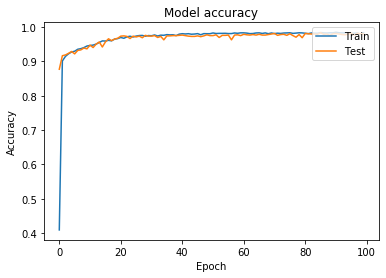

In [73]:
# IF GPU
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# IF CPU
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

The loss for the testing model is seen to be very less compared to the training showing that the mode does better as the number of epochs keep rising. Whilke there are ocassinal spikes in the graph indicating the model has not performed that well onm an average we can see a stable low loss compared to the traning set.

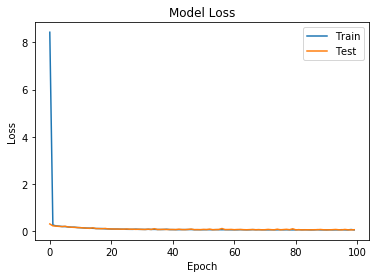

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

The accuracy is calculated for the predictions made and we can see that the model created is highly accurate 

In [75]:
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 97.92307692307692


### Simple Feed Forward Neural Network Model (Regression)

Applying simple feed forward networks to the regression model yeilded a very average result since the least square error function at the last layer didn't prove to be the best that the model could do with a regression problem. We can see the accuracy for the model oscillate between 49 and 57 percent wihch is not a good indicator of this model's performance.

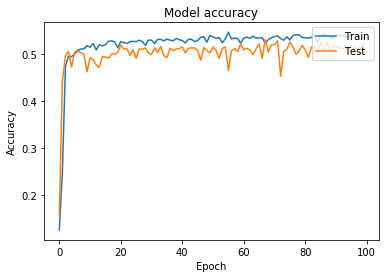

In [76]:
# IF GPU
# plt.plot(history1.history['accuracy'])
# plt.plot(history1.history['val_accuracy'])
# IF CPU
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

As we saw from the previous graph it is a given that with a low accuracy the loss would be much higher than expected. We can clearly see that there is no overlap in the train and testing loss functions which impllies that the chances of hvaing a successful prediction are very low.

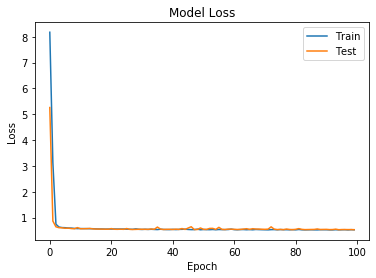

In [77]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

The accuracy score for the regression model turned out to be very low due ot the low accuracy and high loss seen in the graphs above

In [78]:
b = accuracy_score(T1_test, T1_pred)
print('Accuracy is:', b*100)

Accuracy is: 52.15384615384615


### Long Short Term Memory Model (LSTM) (Classification)

LSTM proved to be a little more challenging to apply on the data which focused more on tuning the data. From the graph below we can see that although the training has shown good accuracy the test data doesn't seem to converge. This leaves us with a lower accuracy score in the testing data. But nonetheless the model shows good promise with a high testing accuracy oscillating between 95 and 97 percent.

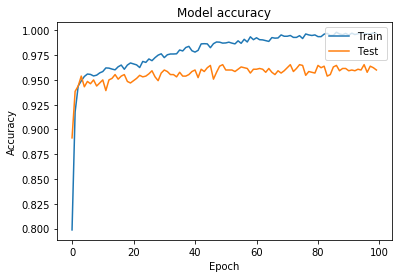

In [79]:
# IF GPU
# plt.plot(history2.history['accuracy'])
# plt.plot(history2.history['val_accuracy'])
# IF CPU
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Of all the mdoels tested soi far, LSTM has shown the lowest stable loss function values on the test set. While it is certainly higher on the test set compared to the training set which can be seen in the accuracy score below, this nevertheless showcases that the predicts made by this model are good.

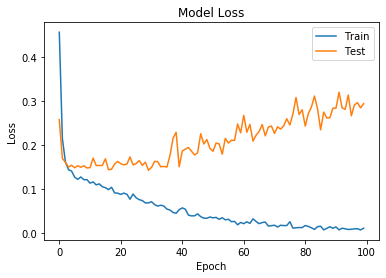

In [80]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

The high accuracy and low loss form the last two grpahs show a very good accuracy score second only to the simple feed forward model used for classification

In [81]:
c = accuracy_score(test2, pred2)
print('Accuracy is:', c*100)

Accuracy is: 96.0


# Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

This has been one of the more interesting challenges to tackle since there is a lot of plug and play to get a highly accurate score on the predictions. This has not only taught me how to design neural models but also taught me how minute modifications to the network and sometimes a complete network overhaul can give a much better score on the predictions.

One of the challenges in this assignment was getting the underlying libraries to run on GPU's directly since I was testing the code directly on my personal; device since I have a CUDA supported graphics driver. The testing speed has been completely different with GPU's racing through the models much faster than the CPU. Setting up the GPU instance of tensor flow was the real challenge since there were a lot off dependencies on the CUDA SDK and its libraries and I chose Windows as my platform of choice since it was better supported.

# References

[1] Keras Documentation, https://keras.io/

[2] Long Short Term Memory Model, TowardsDataScience.com, https://towardsdatascience.com/machine-learning-recurrent-neural-networks-and-long-short-term-memory-lstm-python-keras-example-86001ceaaebc 

[3] Regression Using Keras, MachineLearningMastery.com, https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/ 

[4] Long Shoret Term Memory Model, SkyMind.ai, https://skymind.ai/wiki/lstm 

[5] TesnorFlow GPU documentation, TesnorFlow.org, https://www.tensorflow.org/install/gpu

## Grading

Only well-written notebook will be graded. Please follow the structure and fill in as the other assignments. 

extra credit points | description
--|:--
1 | First structure (implementation, explanation, plot results, discussion of results)
1 | Second structure (implementation, explanation, plot results, discussion of results)
1 | Third structure (implementation, explanation, plot results, discussion of results)
1 | Explaining and discussing the reason for the selection (Any relation to your data?)
  | Comparing the results, discuss or verify your choice 

#### Optional Extra Credits

- [OPT 1] Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources or MAMBA cluster for this test. 
- [OPT 2] Implement one of neural networks in the chart above and apply it to some real data. 

### Code for OPT 1 Extra credit

The commands below are to showcase the hardware used in testing the models which include 

- the CPU info 
- the GPU info and 
- the device used by tensorflow for processing

In [82]:
# To run on Windows only
# !wmic cpu get name

Name                                      

Intel(R) Core(TM) i5-9300H CPU @ 2.40GHz  





In [83]:
# To run if only Windows/Linux drivers are present
# !nvidia-smi

Fri Dec 06 14:07:08 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 431.94       Driver Version: 431.94       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 2060   WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   50C    P5    24W /  N/A |   1065MiB /  6144MiB |      9%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

This is used ot check which device Keras will use to perform the neural network processing.

In [84]:
# If the output here is blank if it is running on CPU

# import tensorflow as tf
# sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:



## Time Comparison between CPU and GPU


As part of the extra credit I will be using the CPU and GPU shown above and calculate the time it takes to execute the models

### Running on CPU

1. Simple Feedforward Model (Classification)
--> 11.90 seconds with 98.38% accuracy

2. Simple Feedforward Model (Regression)
--> 18.20 seconds with 49.69% accuracy

3. Long Short Term Memory (Classification)
--> 604.39 seconds with 96.54% accuracy


### Running on GPU

1. Simple Feedforward Model (Classification)
--> 30.94 seconds with 97.76% accuracy

2. Simple Feedforward Model (Regression)
--> 74.79 seconds with 56.46% accuracy

3. Long Short Term Memory (Classification)
--> 139.56 seconds with 94.69% accuracy

### Observations

We have come across a really interesting observation while performing our comparison
- Simple feedforward networks which should normally run fast on GPU's seem to be running faster on GPUs with an almost equal accuracy
- The biggest benefactor is the LSTM model where we see more than a three fold increase in the time it takes to execute the whole model. This shows how complex neural networks can take advantage of the higher power of the GPU's processing core